In [1]:
import tensorflow as tf

a = tf.constant([1, 2, 3])
b = tf.constant([4, 5, 6])

A = a + b
B = a * b

/Users/GYUNAM/.pyenv/versions/3.4.5/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)


In [2]:
sess = tf.Session()
sess.run(A)

array([5, 7, 9], dtype=int32)

In [3]:
sess.run(B)

array([ 4, 10, 18], dtype=int32)

In [4]:
w = tf.Variable([1, 1])

In [5]:
init = tf.global_variables_initializer()
sess.run(init)

In [6]:
sess.run(w)

array([1, 1], dtype=int32)

In [7]:
x = tf.placeholder(tf.float32, [2, 2])

In [8]:
sess.run(x, feed_dict={x : [[1,2],[3,4]]})

array([[1., 2.],
       [3., 4.]], dtype=float32)

## ANN with Tensorflow

In [9]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


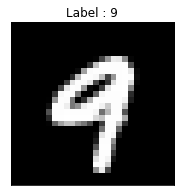

In [11]:
train_x, train_y = mnist.train.next_batch(10)
img = train_x[3,:].reshape(28,28)

plt.figure(figsize=(5,3))
plt.imshow(img,'gray')
plt.title("Label : {}".format(np.argmax(train_y[3])))
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
print ('Train labels : {}'.format(train_y[3, :]))

Train labels : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


### 4.3. Build a Model

In [13]:
n_input = 28*28
n_hidden1 = 100
n_output = 10

In [14]:
weights = {
    'hidden1' : tf.Variable(tf.random_normal([n_input, n_hidden1], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_hidden1, n_output], stddev = 0.1)),
}

biases = {
    'hidden1' : tf.Variable(tf.random_normal([n_hidden1], stddev = 0.1)),
    'output' : tf.Variable(tf.random_normal([n_output], stddev = 0.1)),
}

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output])

In [15]:
# Define Network
def build_model(x, weights, biases):
    # first hidden layer
    hidden1 = tf.add(tf.matmul(x, weights['hidden1']), biases['hidden1'])
    # non linear activate function
    hidden1 = tf.nn.relu(hidden1)
    
    # Output layer with linear activation
    output = tf.add(tf.matmul(hidden1, weights['output']), biases['output'])
    return output

### 4.6. Define Cost, Initializer and Optimizer

In [16]:
# Define Cost
pred = build_model(x, weights, biases)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)
loss = tf.reduce_mean(loss)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
LR = 0.0001
optm = tf.train.AdamOptimizer(LR).minimize(loss)

init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



### 4.8. Define Configuration

In [18]:
n_batch = 50     # Batch Size
n_iter = 2500    # Learning Iteration
n_prt = 250      # Print Cycle

### 4.9. Optimization

In [19]:
# Run initialize
# config = tf.ConfigProto(allow_soft_placement=True)  # GPU Allocating policy
# sess = tf.Session(config=config)
sess = tf.Session()
sess.run(init)

# Training cycle
for epoch in range(n_iter):
    train_x, train_y = mnist.train.next_batch(n_batch)
    sess.run(optm, feed_dict={x: train_x,  y: train_y}) 
    
    if epoch % n_prt == 0:
        #feed_dict는 placeholder에 넣어주는 것임
        c = sess.run(loss, feed_dict={x : train_x,  y : train_y})
        print ("Iter : {}".format(epoch))
        print ("Cost : {}".format(c))

Iter : 0
Cost : 2.582882881164551
Iter : 250
Cost : 1.2828160524368286
Iter : 500
Cost : 0.7529751658439636
Iter : 750
Cost : 0.5248990058898926
Iter : 1000
Cost : 0.303492933511734
Iter : 1250
Cost : 0.42241671681404114
Iter : 1500
Cost : 0.2117110639810562
Iter : 1750
Cost : 0.4845014214515686
Iter : 2000
Cost : 0.3524525761604309
Iter : 2250
Cost : 0.29191458225250244


### 4.10. Test

In [20]:

test_x, test_y = mnist.test.next_batch(100)

my_pred = sess.run(pred, feed_dict={x : test_x})
my_pred = np.argmax(my_pred, axis=1)

labels = np.argmax(test_y, axis=1)

accr = np.mean(np.equal(my_pred, labels))
print("Accuracy : {}%".format(accr*100))

Accuracy : 90.0%


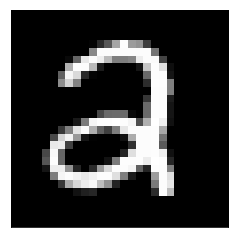

Prediction : 2
Probability : [0.   0.   0.86 0.14 0.   0.   0.   0.   0.   0.  ]


In [21]:
test_x, test_y = mnist.test.next_batch(1)
logits = sess.run(tf.nn.softmax(pred), feed_dict={x : test_x})
predict = np.argmax(logits)

plt.imshow(test_x.reshape(28,28), 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

print('Prediction : {}'.format(predict))
np.set_printoptions(precision=2, suppress=True)
print('Probability : {}'.format(logits.ravel()))